# 数字信号处理python实现
## 主要用到的包
    scipy: 
    numpy:
    matplotlib:
    

scipy.signal 库的总结：https://blog.csdn.net/chehec2010/article/details/117109246
scipy.signal 官方总结：https://docs.scipy.org/doc/scipy/reference/signal.html#scipy.signal

## 导入包

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

1、离散时间信号序列的表示：

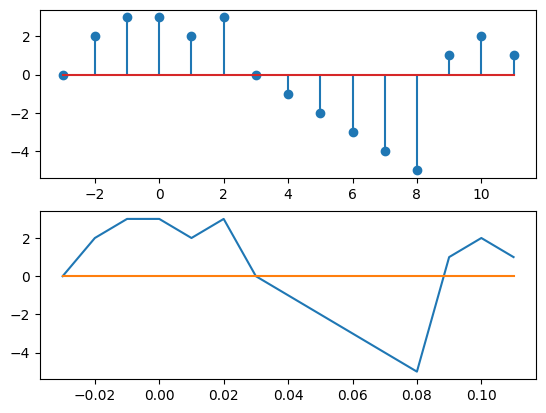

In [2]:
N=np.linspace(-3,11,15,dtype=int)
x=np.array([0,2,3,3,2,3,0,-1,-2,-3,-4,-5,1,2,1])
dt=0.01 # 定义时间间隔dt为0.01秒。
n=N*dt # 计算时间点n，即将数组N中的每个元素乘以时间间隔dt。
fig=plt.figure() # 创建一个matplotlib的图形对象fig。
ax1=fig.add_subplot(2,1,1)
ax1.stem(N,x) # 在子图ax1中绘制N和x的.stem图，这是一种特殊的图表，用于显示离散数据。
ax2=fig.add_subplot(2,1,2)
ax2.plot(n,x)
ax2.plot(n,np.zeros(len(n)))

 2、采样定理：
    对于一个最高频率成分有限制的连续时间信号，如果以至少两倍的最高频率（称为奈奎斯特频率）进行均匀采样，那么原始连续信号可以完全由这些采样值确定，并且可以通过适当的数学方法从这些采样值中无失真地重建原始信号。用数学语言来描述，如果一个连续时间信号$x(t)$包含的最高频率成分为$f_{max}$，则采样频率$f_s$ 必须满足以下条件：
    $$ f_s > 2f_{max} $$ 这里$f_s$表示每秒钟采样的次数，单位是Hz。

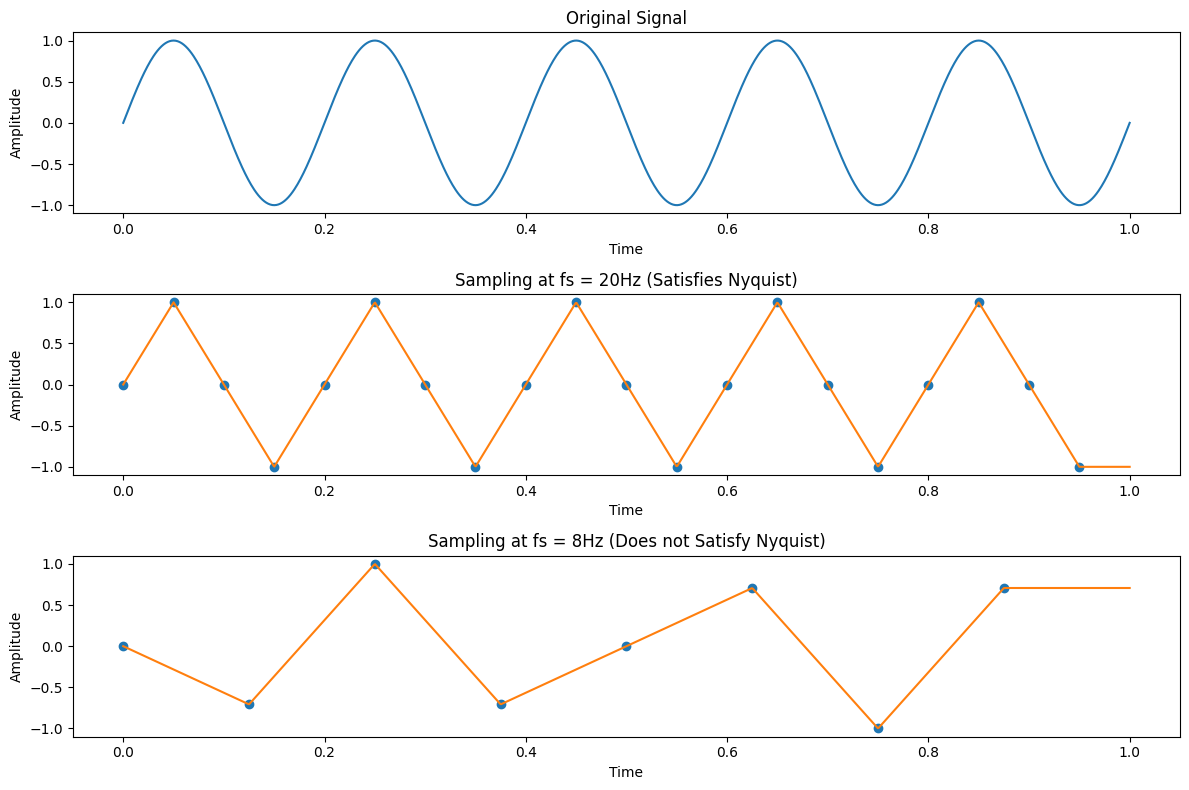

In [3]:
# 生成连续时间信号
t = np.linspace(0, 1, 1000)  # 时间向量
f = 5  # 信号频率
x = np.sin(2 * np.pi * f * t)  # 原始信号

# 设置不同的采样频率
fs1 = 20  # 满足采样定理的采样频率
fs2 = 8   # 不满足采样定理的采样频率

# 采样
t_s1 = np.linspace(0, 1, fs1, endpoint=False)
t_s2 = np.linspace(0, 1, fs2, endpoint=False)
x_s1 = np.sin(2 * np.pi * f * t_s1)
x_s2 = np.sin(2 * np.pi * f * t_s2)

# 重建信号
t_interp = np.linspace(0, 1, 1000)
x_recon1 = np.interp(t_interp, t_s1, x_s1)
x_recon2 = np.interp(t_interp, t_s2, x_s2)

# 绘制图形
plt.figure(figsize=(12, 8))

# 原始信号
plt.subplot(3, 1, 1)
plt.plot(t, x, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# 满足采样定理的采样和重建
plt.subplot(3, 1, 2)
plt.plot(t_s1, x_s1, 'o', label='Sampled Points')
plt.plot(t_interp, x_recon1, label='Reconstructed Signal')
plt.title('Sampling at fs = 20Hz (Satisfies Nyquist)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# 不满足采样定理的采样和重建
plt.subplot(3, 1, 3)
plt.plot(t_s2, x_s2, 'o', label='Sampled Points')
plt.plot(t_interp, x_recon2, label='Reconstructed Signal')
plt.title('Sampling at fs = 8Hz (Does not Satisfy Nyquist)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# 显示图形
plt.tight_layout()
plt.show()


3、单位阶跃函数：

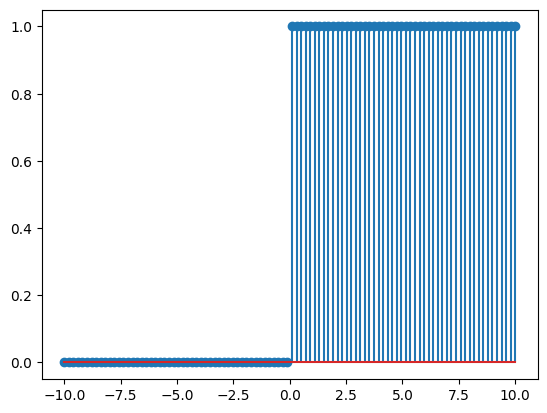

In [4]:
def unit_step_function(t):
    return np.where(t >= 0, 1, 0)
# 测试单位阶跃函数
t_values = np.linspace(-10, 10, 100)
h_values = unit_step_function(t_values)
plt.stem(t_values,h_values)
plt.show()

<StemContainer object of 3 artists>

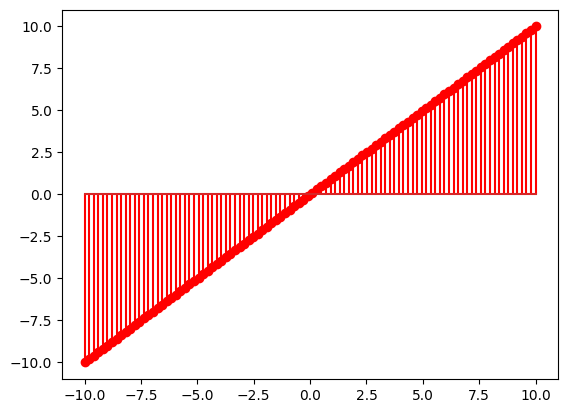

In [5]:
plt.stem(t_values,t_values,'r')

4、正弦信号序列

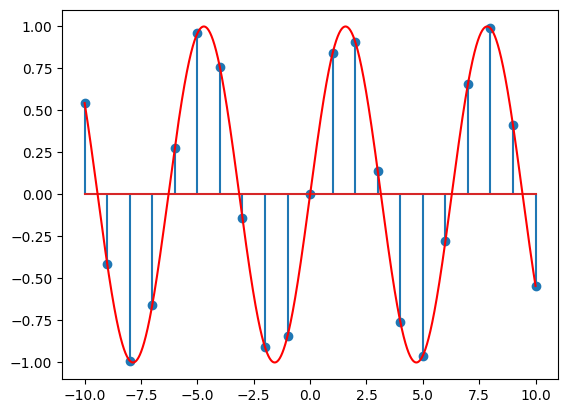

In [6]:
x=np.linspace(-10,10,21,dtype=int)
z=np.linspace(-10,10,10000,dtype=float)
plt.stem(x,np.sin(x))
plt.plot(z,np.sin(z),'r')
plt.show()

5、实指数序列

$$ x(n) = a^nu(n) $$

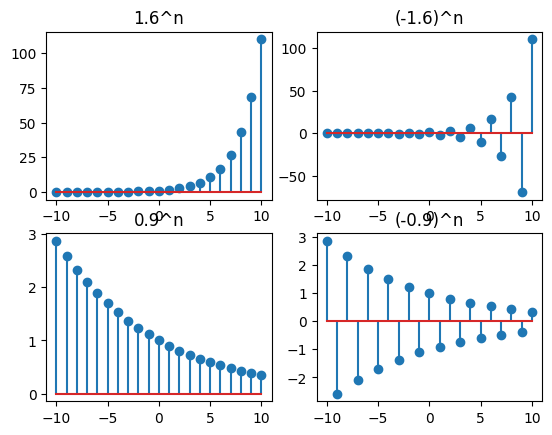

In [7]:
import sympy as sy
n=np.linspace(-10,10,21,dtype=int)
y1=np.power(1.6,n)
y2=np.power(-1.6,n)
y3=np.power(0.9,n)
y4=np.power(-0.9,n)
f=plt.figure()
ax1=f.add_subplot(2,2,1)
ax1.stem(n,y1)
ax2=f.add_subplot(2,2,2)
ax2.stem(n,y2)
ax3=f.add_subplot(2,2,3)
ax3.stem(n,y3)
ax4=f.add_subplot(2,2,4)
ax4.stem(n,y4)
ax1.set_title('1.6^n')
ax2.set_title('(-1.6)^n')
ax3.set_title('0.9^n')
ax4.set_title('(-0.9)^n')
plt.show()


6、复指数序列

C:\Users\jiahu\.conda\envs\huang\Lib\site-packages\numpy\ma\core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\jiahu\.conda\envs\huang\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


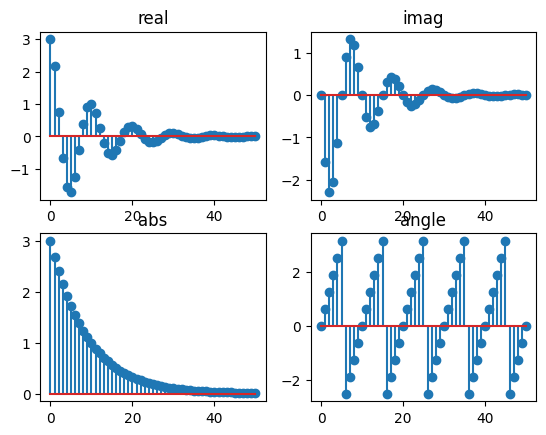

In [8]:
import cmath
n=np.linspace(0,50,51,dtype=complex)
A=3
a=-1/9
b=np.pi/5
h=-1/9+np.pi/5j
x=A*np.exp(h*n)
f=plt.figure()
ax1=f.add_subplot(2,2,1)
ax1.stem(n,x.real)
ax2=f.add_subplot(2,2,2)
ax2.stem(n,x.imag)
ax3=f.add_subplot(2,2,3)
ax3.stem(n,abs(x))
ax4=f.add_subplot(2,2,4)
y=np.array([-cmath.phase(i) for i in x])#如果直接用phase的话，和matlab计算的angle是相反的，所以我这里为了和matlab一样，就用了-phase
ax4.stem(n,y)
ax1.set_title('real')
ax2.set_title('imag')
ax3.set_title('abs')
ax4.set_title('angle')
plt.show()

7、序列反转、移位

C:\Users\jiahu\AppData\Local\Temp\ipykernel_39440\3832994645.py:17: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, x, use_line_collection=True)
C:\Users\jiahu\AppData\Local\Temp\ipykernel_39440\3832994645.py:22: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, x_reversed, use_line_collection=True)
C:\Users\jiahu\AppData\Local\Temp\ipykernel_39440\3832994645.py:27: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_c

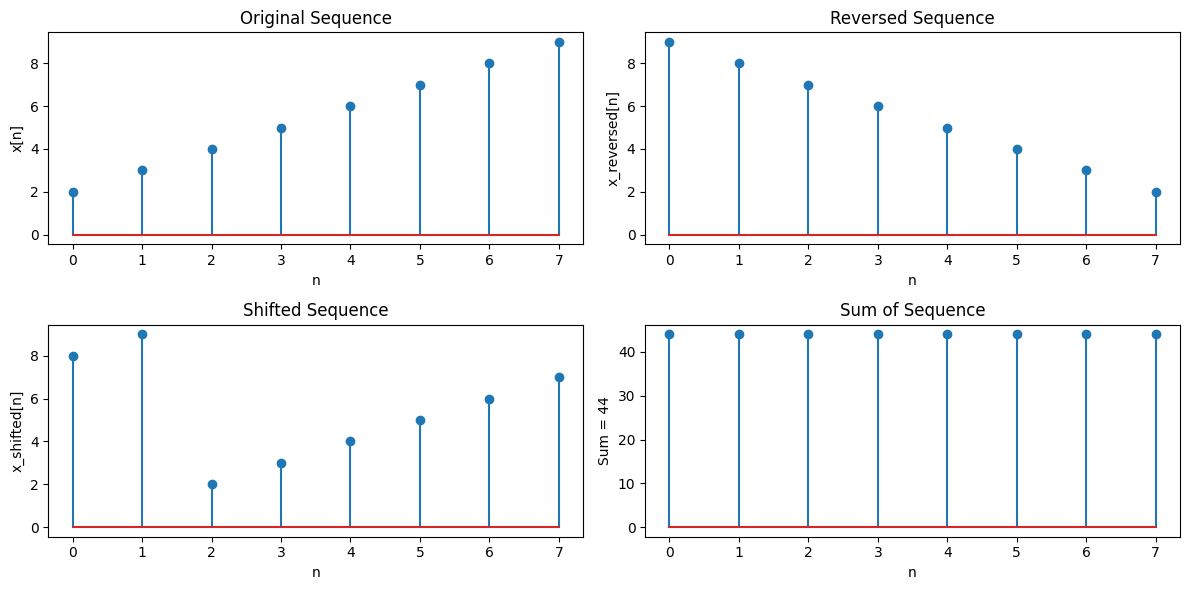

In [9]:
# nx=np.linspace(-2,5,8,dtype=int)
x=np.linspace(2,9,8,dtype=int)

# 定义一个示例序列
# x = np.array([1, 2, 3, 4, 5])
# 序列反转
x_reversed = np.flip(x)
# 序列移位（假设向右移位2位）
shift_amount = 2
x_shifted = np.roll(x, shift_amount)
# 序列求和
x_sum = np.sum(x)
# 绘制序列
n = np.arange(len(x))
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.stem(n, x, use_line_collection=True)
plt.title('Original Sequence')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.subplot(2, 2, 2)
plt.stem(n, x_reversed, use_line_collection=True)
plt.title('Reversed Sequence')
plt.xlabel('n')
plt.ylabel('x_reversed[n]')
plt.subplot(2, 2, 3)
plt.stem(n, x_shifted, use_line_collection=True)
plt.title('Shifted Sequence')
plt.xlabel('n')
plt.ylabel('x_shifted[n]')
plt.subplot(2, 2, 4)
plt.stem(n, np.full_like(x, x_sum), use_line_collection=True)
plt.title('Sum of Sequence')
plt.xlabel('n')
plt.ylabel('Sum = {}'.format(x_sum))
plt.tight_layout()
plt.show()

8、信号的尺度变换

C:\Users\jiahu\AppData\Local\Temp\ipykernel_39440\746077823.py:31: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(N), y_discrete, use_line_collection=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


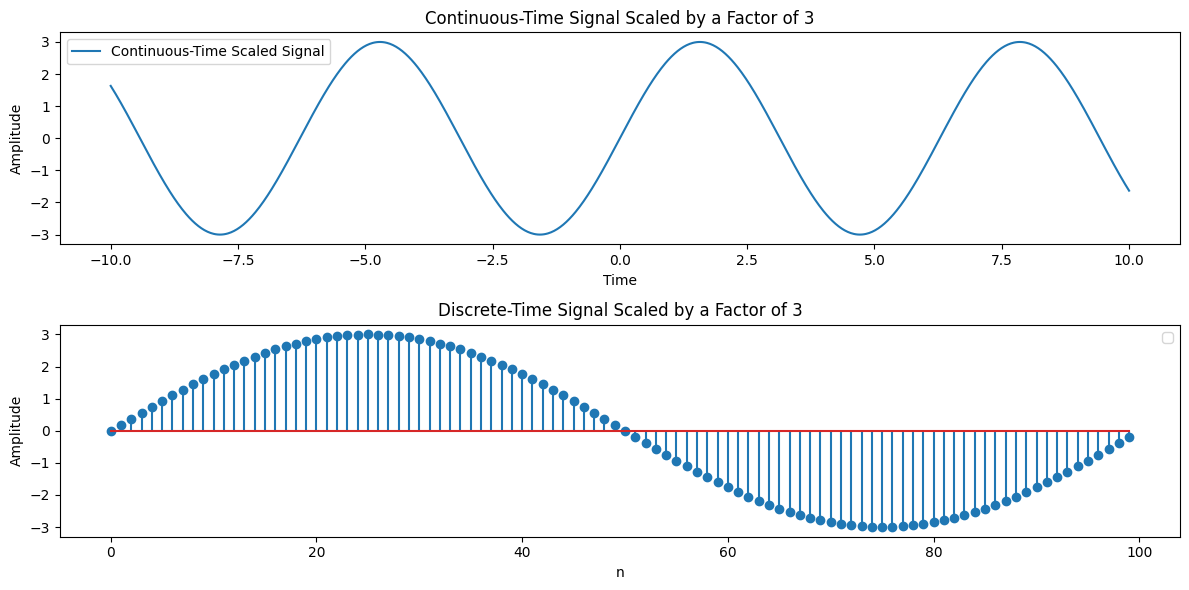

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 定义一个简单的连续时间信号，例如正弦波
t = np.linspace(-10, 10, 1000)
x = np.sin(t)

# 定义尺度变换因子
a = 3

# 连续时间信号的尺度变换
y_continuous = a * x

# 离散时间信号的尺度变换
N = 100
x_discrete = np.sin(2 * np.pi * np.arange(N) / N)
y_discrete = a * x_discrete

# 绘制连续时间信号的尺度变换结果
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, y_continuous, label='Continuous-Time Scaled Signal')
plt.title('Continuous-Time Signal Scaled by a Factor of 3')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# 绘制离散时间信号的尺度变换结果
plt.subplot(2, 1, 2)
plt.stem(np.arange(N), y_discrete, use_line_collection=True)
plt.title('Discrete-Time Signal Scaled by a Factor of 3')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


9、信号的奇偶变换
偶分量：是信号关于y轴对称的部分
$$ x_e(t) = \frac{x(t) + x(-t)}{2} $$
奇分量：是信号关于原点对称的部分
$$ x_o(t) = \frac{x(t) - x(-t)}{2} $$ 

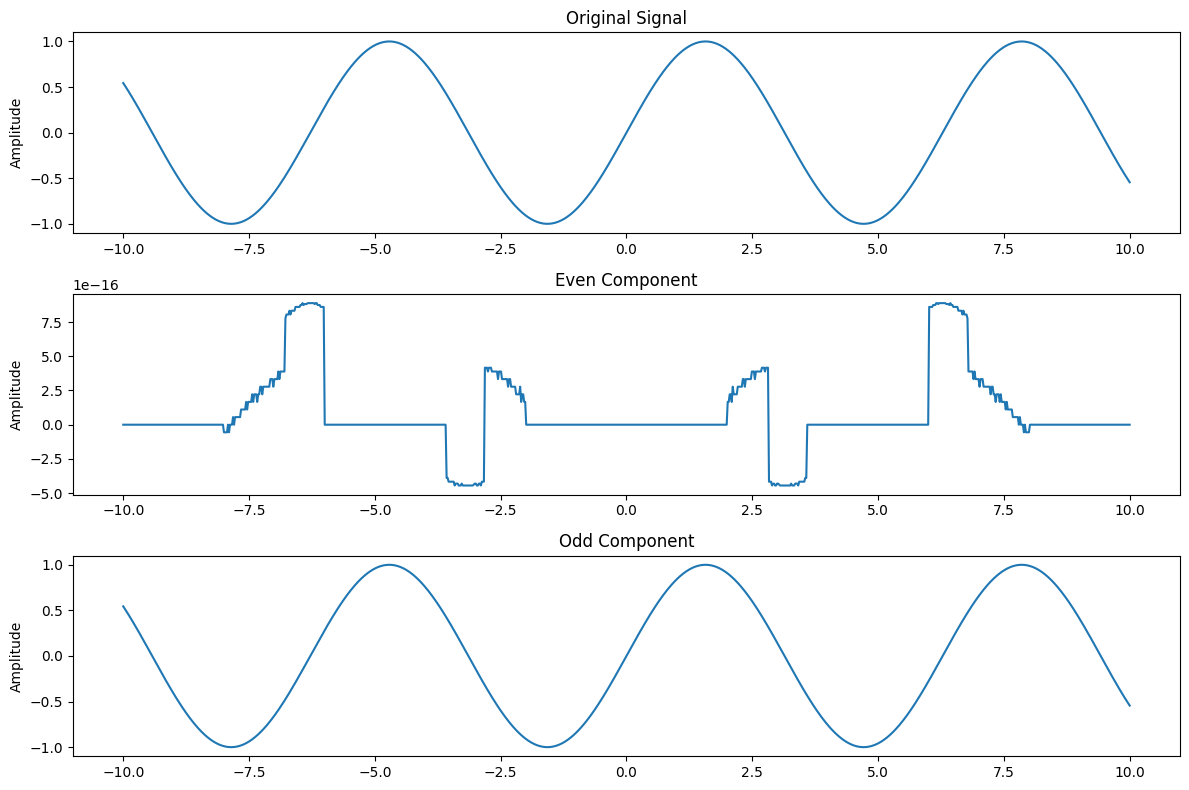

In [11]:
# 定义一个简单的连续时间信号，例如正弦波
t = np.linspace(-10, 10, 1000)
x = np.sin(t)
# 计算偶分量和奇分量
x_even = (x + x[::-1]) / 2
x_odd = (x - x[::-1]) / 2
# 绘制原始信号及其奇偶分量
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, x, label='Original Signal')
plt.ylabel('Amplitude')
plt.title('Original Signal')
plt.subplot(3, 1, 2)
plt.plot(t, x_even, label='Even Component')
plt.ylabel('Amplitude')
plt.title('Even Component')
plt.subplot(3, 1, 3)
plt.plot(t, x_odd, label='Odd Component')
plt.ylabel('Amplitude')
plt.title('Odd Component')
plt.tight_layout()
plt.show()

10、信号的微分

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


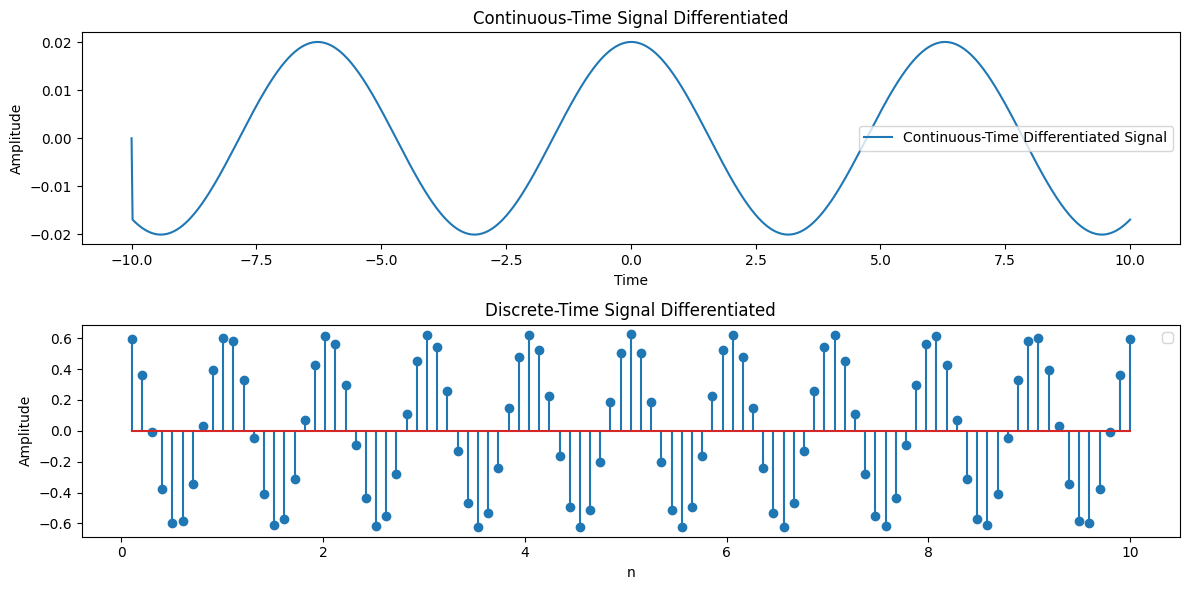

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 定义一个简单的连续时间信号，例如正弦波
t = np.linspace(-10, 10, 1000)
x = np.sin(t)

# 连续时间信号的微分
y_continuous = np.diff(x)
# 定义离散时间信号的采样点
N = 100
t_discrete = np.linspace(0, 10, N)
x_discrete = np.sin(2 * np.pi * t_discrete)
# 离散时间信号的微分
y_discrete = x_discrete[1:] - x_discrete[:-1]
# 修正连续时间信号的微分结果
y_continuous_corrected = np.append(0, y_continuous)  # 在 t=0 处添加一个值以保持连续性
# 重新绘制连续时间信号的微分结果
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, y_continuous_corrected, label='Continuous-Time Differentiated Signal')
plt.title('Continuous-Time Signal Differentiated')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
# 绘制离散时间信号的微分结果（保持不变）
plt.subplot(2, 1, 2)
plt.stem(t_discrete[1:], y_discrete)
plt.title('Discrete-Time Signal Differentiated')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.legend()
plt.tight_layout()
plt.show()

11、信号的积分

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


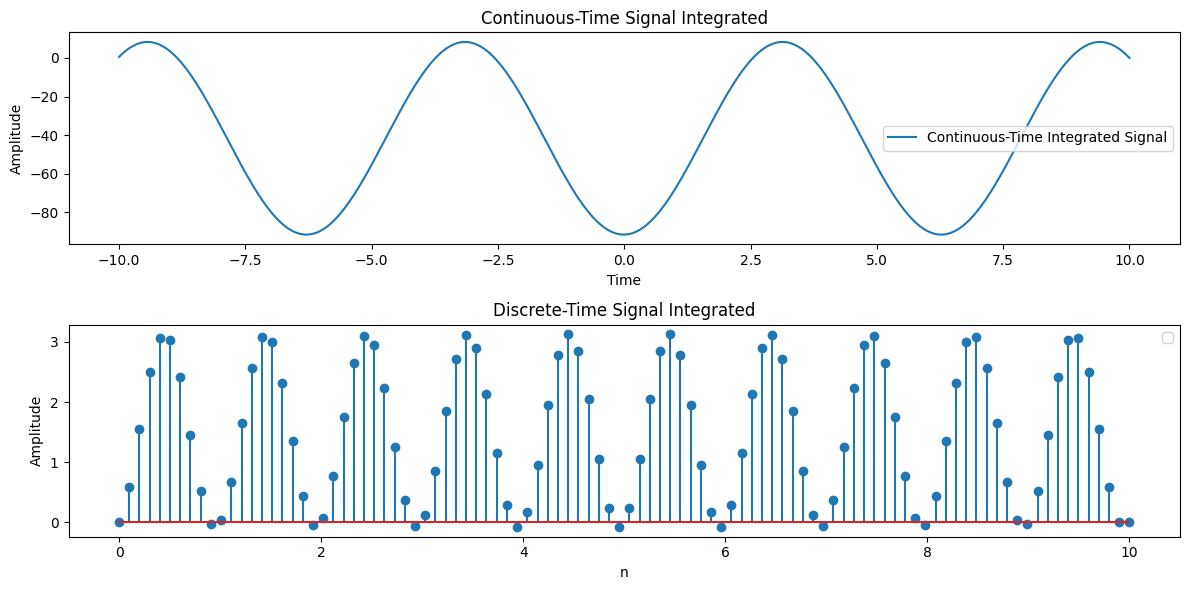

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 定义一个简单的连续时间信号，例如正弦波
t = np.linspace(-10, 10, 1000)
x = np.sin(t)

# 连续时间信号的积分
y_continuous = np.cumsum(x)

# 定义离散时间信号的采样点
N = 100
t_discrete = np.linspace(0, 10, N)
x_discrete = np.sin(2 * np.pi * t_discrete)

# 离散时间信号的积分
y_discrete = np.cumsum(x_discrete)

# 绘制连续时间信号的积分结果
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, y_continuous, label='Continuous-Time Integrated Signal')
plt.title('Continuous-Time Signal Integrated')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# 绘制离散时间信号的积分结果
plt.subplot(2, 1, 2)
plt.stem(t_discrete, y_discrete)
plt.title('Discrete-Time Signal Integrated')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


12、信号的卷积

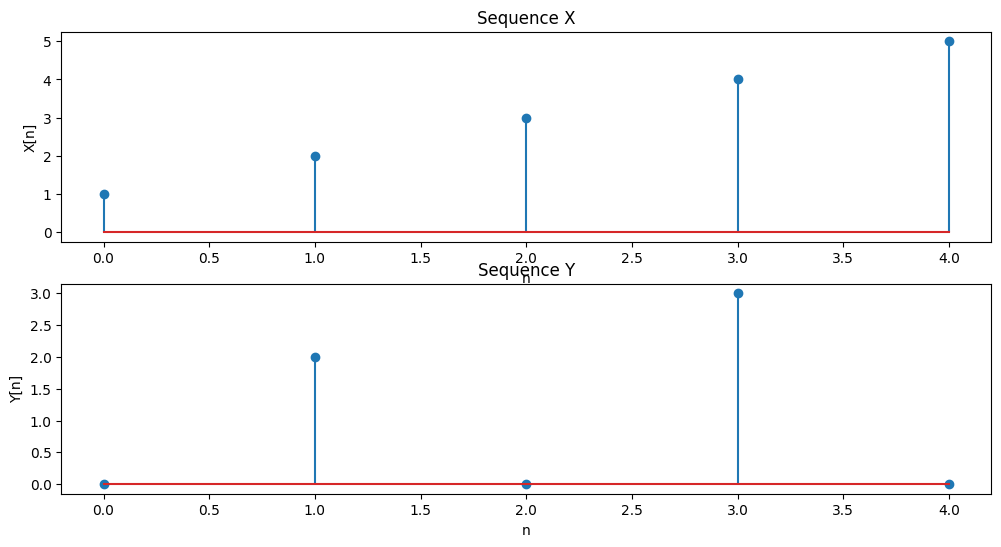

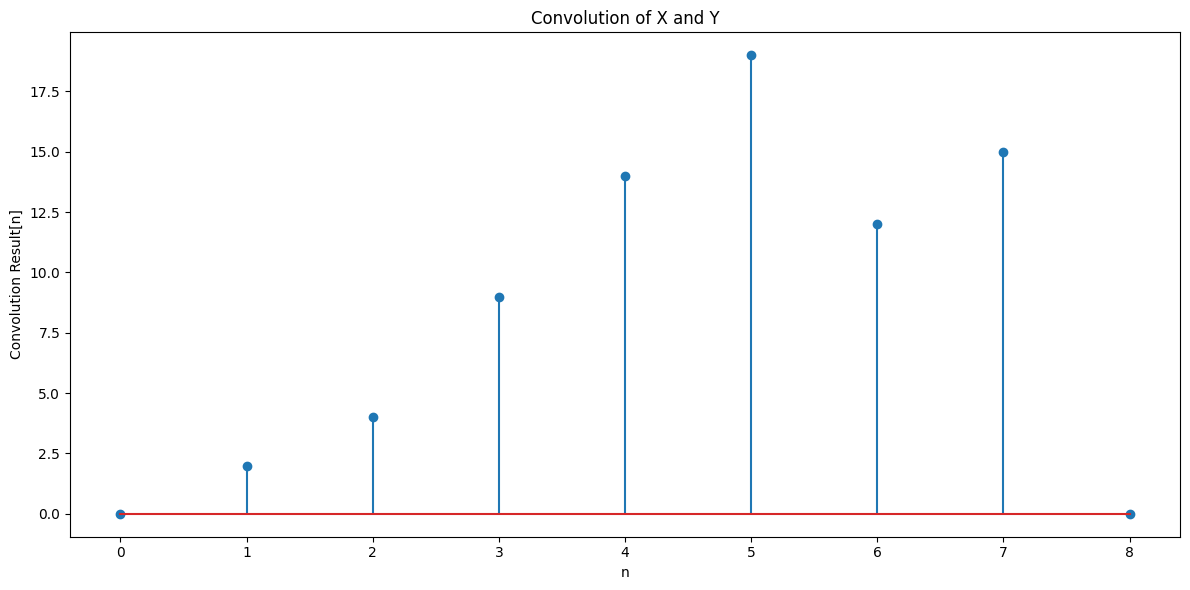

In [14]:

# 定义两个简单的离散时间序列
x = np.array([1, 2, 3, 4, 5])
y = np.array([0, 2, 0, 3, 0])

# 计算序列的卷积
convolution_result = np.convolve(x, y)

# 绘制原始序列和卷积结果
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.stem(x)
plt.title('Sequence X')
plt.xlabel('n')
plt.ylabel('X[n]')

plt.subplot(2, 1, 2)
plt.stem(y)
plt.title('Sequence Y')
plt.xlabel('n')
plt.ylabel('Y[n]')

plt.figure(figsize=(12, 6))
plt.stem(convolution_result)
plt.title('Convolution of X and Y')
plt.xlabel('n')
plt.ylabel('Convolution Result[n]')

plt.tight_layout()
plt.show()


13、信号的自相关和互相关

自相关函数： [ 415  574  749  936 1131 1330 1131  936  749  574]
互相关函数： [ 50  72  97 124 153 184 174 160 142 120]


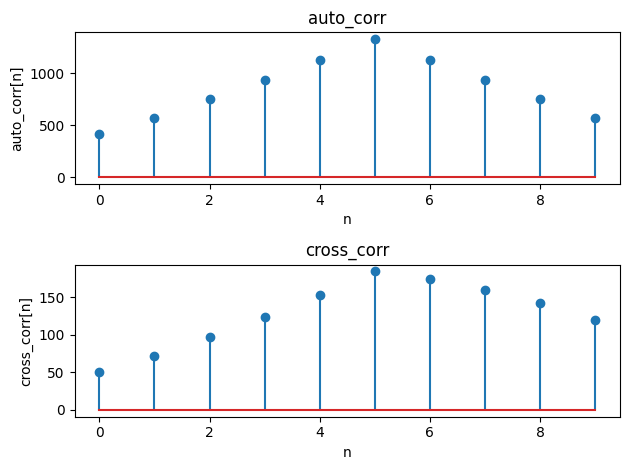

In [16]:
#计算自相关和互相关
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.stats import pearsonr
x=np.array([1,3,5,7,9,11,13,15,17,19])
y=np.array([1,1,1,1,2,2,2,2,2,2]) 
# 计算自相关函数
auto_corr = signal.correlate(x, x, mode='same')
# 计算互相关函数
cross_corr = signal.correlate(x, y, mode='same')
# np.correlate
print("自相关函数：", auto_corr)
print("互相关函数：", cross_corr)
# t = np.linspace(len(auto_corr))
plt.subplot(2, 1, 1)
plt.stem(auto_corr)
plt.title('auto_corr')
plt.xlabel('n')
plt.ylabel('auto_corr[n]')
plt.subplot(2, 1, 2)
plt.stem(cross_corr)
plt.title('cross_corr')
plt.xlabel('n')
plt.ylabel('cross_corr[n]')
plt.tight_layout()
plt.show()

14、生成chirp信号

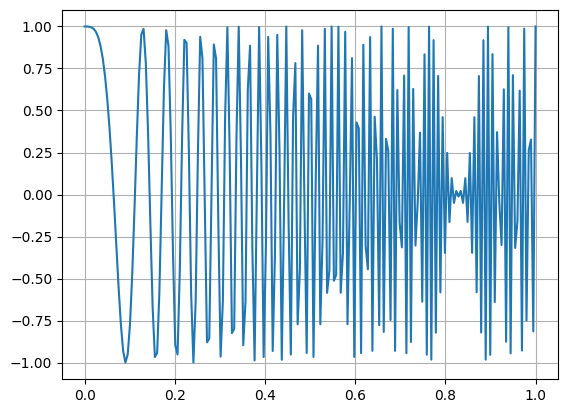

(200,) float64


In [26]:
from scipy import signal 

t=np.linspace(0,1,200,dtype=float)
 
# scipy.signal.chirp(t, f0, t1, f1, method='linear', phi=0, vertex_zero=True)
 
h=signal.chirp(t,0,1,120,method='linear',phi=np.pi/3)#linear线性\quadratic二次扫描、logarithmic对数扫描（这时候f0、f1均不能为零）
plt.plot(t,h)
plt.grid(visible=True)
plt.show()
print(h.shape,h.dtype)

15、（插入）信号的FFT
    由采样定理可知：如果信号是带限的，采样频率至少高于信号最高频率的两倍才能完整的保留信号的原始信息

In [ ]:
def fft(fs, data):
    pass

